In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import ast
from pylab import mpl
import numpy as np
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
from sklearn.linear_model import LinearRegression

In [2]:
file_list = os.listdir('C:/Users/86137/Desktop/大数据实践/数据分析实践/作业/data')
merged_data=pd.DataFrame()
for file_name in file_list:
    file_path = 'C:/Users/86137/Desktop/大数据实践/数据分析实践/作业/data/' + file_name
    data = pd.read_excel(file_path)
    merged_data=pd.concat([merged_data, data])
merged_data.to_excel('merged.xlsx',index=False)

In [3]:
drop_data=merged_data.drop(columns=['中标公告唯一标识','投诉情况','回复情况','专家姓名','费率或其它类型结果'])

len(drop_data.columns)

15

In [4]:
data_del=drop_data.drop_duplicates(['标段编号'])

In [5]:
data_del[data_del.duplicated()]

,标段名称,标段编号,中标公告发布时间,中标单位,中标单位代码,中标价,项目负责人,工期,质量承诺,项目名称,中标时间,标段所在行政区域代码,交易平台名称,行政监督机构名称,交易平台标识码


In [7]:
data_del.to_excel("data_dup.xlsx",index=False)

In [21]:
data_dup=pd.read_excel("data_dup.xlsx")

In [8]:
data_2020=data_dup.loc[data_dup['中标时间'].str.contains('2020'),:]

In [9]:
data_2020 = data_2020.reset_index(drop=True)
data_2020['中标单位'].value_counts()[0:5]

中国电建集团华东勘测设计研究院有限公司    62
浙江明康工程咨询有限公司           59
浙江省交通规划设计研究院有限公司       57
浙江大东吴集团建设有限公司          51
浙江大学建筑设计研究院有限公司        50
Name: 中标单位, dtype: int64

In [155]:
data_2021=data_dup.loc[data_dup['中标时间'].str.contains('2021'),:]
data_2021=data_2021.reset_index(drop=True)
data_max=data_2021['交易平台名称'].value_counts()[0:1]
data_money=data_2021.groupby(['交易平台名称'],as_index=False)['中标价'].sum()
data_money[data_money['交易平台名称']=='安吉县公共资源交易中心']

,交易平台名称,中标价
26,安吉县公共资源交易中心,5.411426e+09


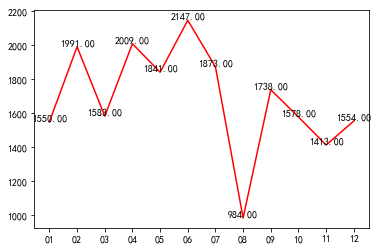

In [11]:
from collections import Counter
month_res=[]
for i in range(len(data_2021['标段名称'])):
    data_month=data_2021['中标时间'][i][5:7]
    month_res.append(data_month)
month_dict=Counter(month_res)
x=sorted(month_dict.keys())
y=month_dict.values()
for a,b in zip(x,y):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10);
plt.plot(x,y,'r')
plt.show()

In [12]:
data_2022=data_dup.loc[data_dup['中标时间'].str.contains('2022'),:]
data_2022=data_2022.reset_index(drop=True)

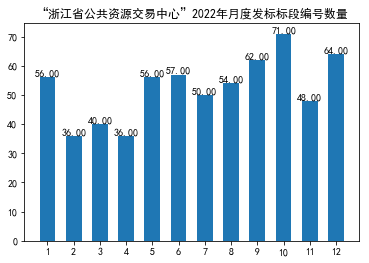

In [13]:
data_zj=data_2022.loc[data_2022["交易平台名称"]=='浙江省公共资源交易中心'].reset_index(drop=True)
month_res=[]
for i in range(len(data_zj['标段名称'])):
    data_month=data_zj['中标时间'][i][5:7]
    month_res.append(data_month)
month_dict=list(Counter(month_res).items())
month_list=sorted(month_dict) 
data=[]
for i in range(len(month_list)):
    data.append(month_list[i][1])
labels=range(1,13)
for a,b in zip(x,data):   
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10);
plt.title('“浙江省公共资源交易中心”2022年月度发标标段编号数量')
plt.bar(x,data,0.6,tick_label=labels)
plt.show()


In [14]:
data_kq=data_2021.loc[data_2021["交易平台名称"]=='绍兴市柯桥区公共资源交易中心'].reset_index(drop=True)
data_sy=data_2021.loc[data_2021["交易平台名称"]=='绍兴市上虞区公共资源交易中心'].reset_index(drop=True)


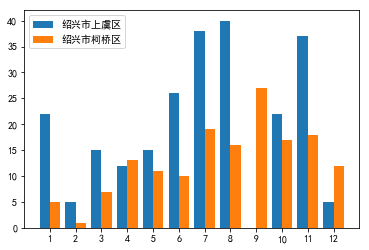

In [189]:
month_res=[]
month_res1=[]
for i in range(len(data_sy['标段名称'])):
    data_month=data_sy['中标时间'][i][5:7]
    month_res.append(data_month)
month_dict=Counter(month_res)
month_dict['09']=0
month_dict = sorted(month_dict.items(), key=lambda k: int(k[0]))
for i in range(len(data_kq['标段名称'])):
    data_month1=data_kq['中标时间'][i][5:7]
    month_res1.append(data_month1)
month_dict1=Counter(month_res1)
month_dict1 = sorted(month_dict1.items(), key=lambda k: int(k[0]))
data=[x[1] for x in month_dict]
data1=[x[1] for x in month_dict1]

plt.figure()
length = len(data)
x = np.arange(length)
total_width, n = 0.8, 2   
width = total_width / n   
x1 = x
x2 = x+width
labels=range(1,13)
plt.xticks([x+width/2 for x in range(12)],np.arange(1,13))
plt.bar(x1, data, width=width,label='绍兴市上虞区')
plt.bar(x2, data1, width=width,label='绍兴市柯桥区')
plt.legend()
plt.show()

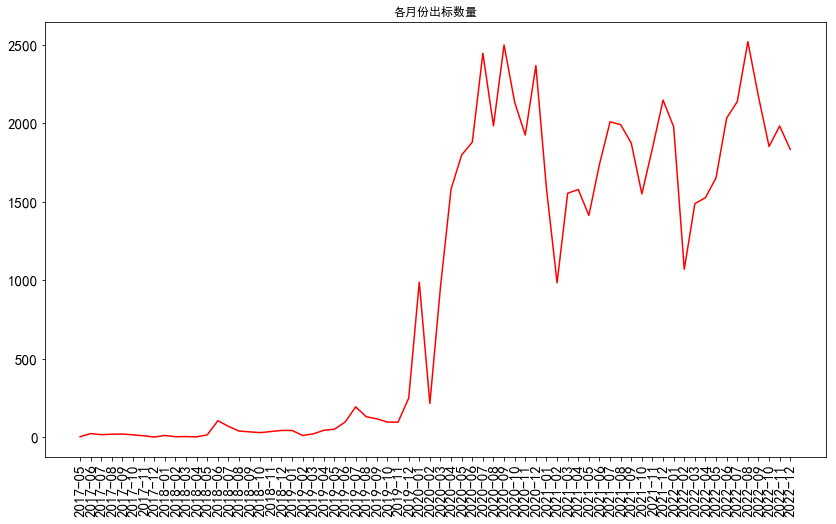

In [165]:
time_dict={}
for i in range(len(data_dup['标段名称'])):
    time=data_dup['中标时间'][i][:7]
    if time in time_dict:
        time_dict[time]+=1
    else: time_dict[time]=1
time_all=pd.DataFrame(time_dict,index=['sum'])
# for a,b in zip(np.arange(len(time_all.columns)),time_all.values[0]):   
#     plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=2);
plt.figure(figsize=(14,8))
plt.title('各月份出标数量')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.plot(time_all.columns,time_all.values[0],'r')
plt.show()

In [162]:
money_dict={}
for i in range(len(data_dup['标段名称'])):
    time=data_dup['中标时间'][i][:7]
    val=data_dup['中标价'][i].astype('int64')
    if time in money_dict:
        money_dict[time]+=val
    else: money_dict[time]=val
money_all=pd.DataFrame(money_dict,index=['sum'])

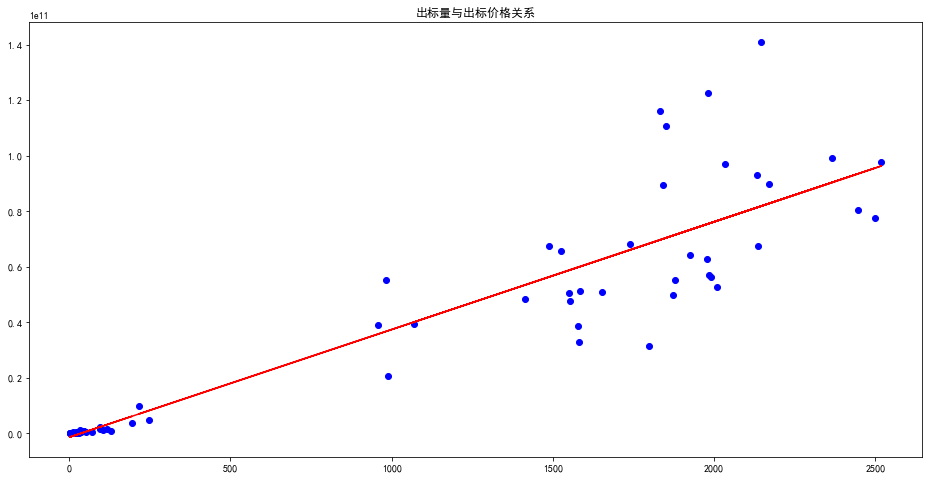

[9.8018891e+10]
0.8335383037166096
[5.24600639e+10]
0.8335383037166096


In [154]:
time_all.values[0]=list(time_all.values[0])
money_all.values[0]=list(money_all.values[0])
data_train=np.array(time_all.values[0]).reshape(time_all.values[0].shape[0],1)
data_test=money_all.values[0]
regr=LinearRegression()
regr.fit(data_train,data_test)
plt.figure(figsize=(16,8))
plt.title('出标量与出标价格关系')
plt.scatter(time_all.values[0],money_all.values[0],c='blue')
plt.plot(time_all.values[0],regr.predict(np.array(time_all.values[0]).reshape(time_all.values[0].shape[0],1)),color='red') 
plt.show()
jan=regr.predict(2561.5)
print(jan)
print(regr.score(data_train,data_test))
fub=regr.predict(1388.4)
print(fub)
print(regr.score(data_train,data_test))

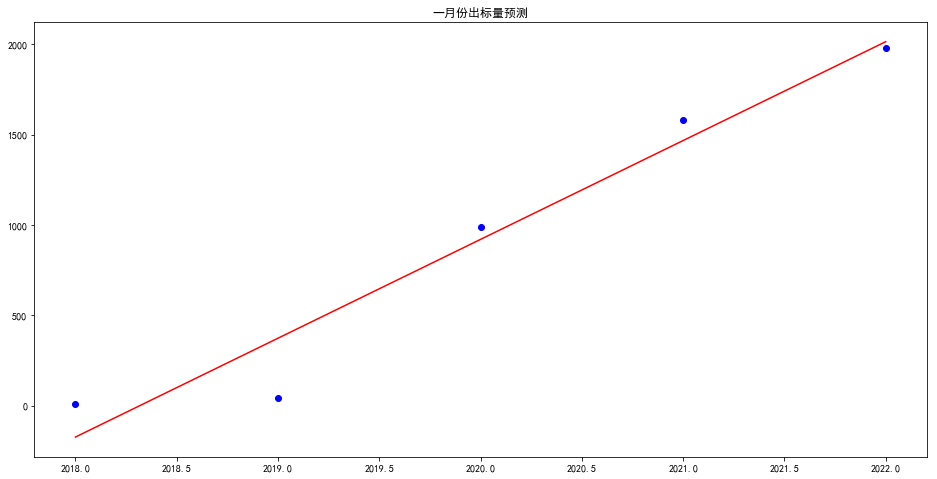

[2561.5]
0.948535251624452


In [161]:
time_jan=pd.DataFrame()
for i in range(len(time_all.columns)):
    if time_all.columns[i][5:] == '01':
        time_jan[time_all.columns[i]]=time_all[time_all.columns[i]] 
x=np.array(range(2018,2023,1))      
data_train=np.array(x.reshape(x.shape[0],1))
data_test=time_jan.values[0]           
regr=LinearRegression()
regr.fit(data_train,data_test)    
plt.figure(figsize=(16,8))
plt.title('一月份出标量预测')
plt.scatter(x,time_jan.values[0],c='blue')
plt.plot(x,regr.predict(np.array(x).reshape(x.shape[0],1)),color='red') 
plt.show()
a=regr.predict(2023)
print(a)
print(regr.score(data_train,data_test))
 

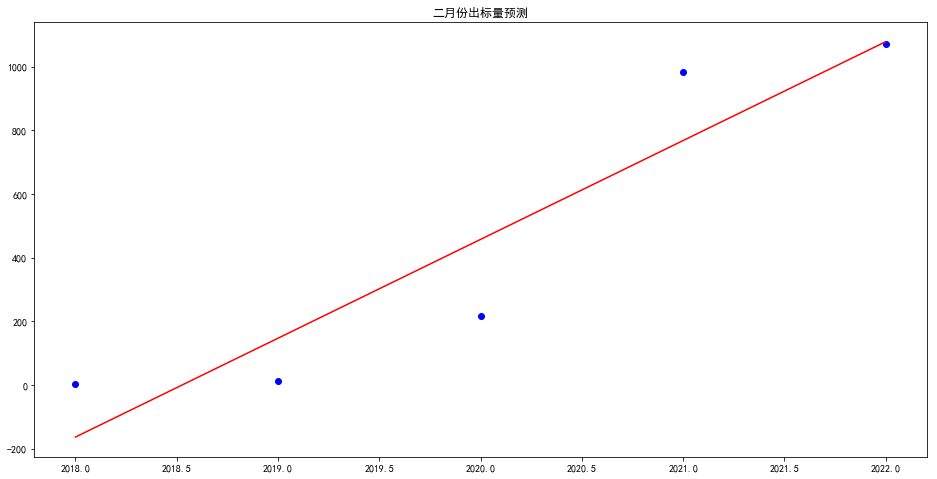

[1388.4]
0.8642541599808967


In [153]:
time_fub=pd.DataFrame()
for i in range(len(time_all.columns)):
    if time_all.columns[i][5:] == '02':
        time_fub[time_all.columns[i]]=time_all[time_all.columns[i]] 
x=np.array(range(2018,2023,1))      
data_train=np.array(x.reshape(x.shape[0],1))
data_test=time_fub.values[0]           
regr=LinearRegression()
regr.fit(data_train,data_test)  
plt.figure(figsize=(16,8))
plt.title('二月份出标量预测')
plt.scatter(x,time_fub.values[0],c='blue')
plt.plot(x,regr.predict(np.array(x).reshape(x.shape[0],1)),color='red') 
plt.show()
a=regr.predict(2023)
print(a)
print(regr.score(data_train,data_test))   

In [188]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])